In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import xarray as xr

import random
from IPython.display import HTML

import cartopy.feature as cfeature

from herbie import Herbie_latest, FastHerbie, Herbie
from toolbox import EasyMap, pc, ccrs
import metpy
from metpy.units import units
from paint.standard2 import cm_tmp

from pyart.graph import cm_colorblind 
import xmovie
# I like Py-ART's colorblind freindly colormaps

In [45]:
H = Herbie_latest(model="hrrr", fxx=range(0,10))
H

Could not find 7/63 GRIB files.


▌▌Herbie HRRR model sfc product initialized 2023-Jan-15 19:00 UTC F02 ┊ source=aws

In [112]:
H = Herbie(
    mt,  # model run date
    model="hrrr",  # model name
    product="sfc",  # model produce name (model dependent)
    fxx=1,  # forecast lead time
)
H.read_idx(searchString=":APCP")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws


,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
83,84,64283271,64681461,64283271-64681461,2023-01-15 12:00:00,2023-01-15 13:00:00,APCP,surface,0-1 hour acc fcst,:APCP:surface:0-1 hour acc fcst


In [124]:
qstr = '(' 
nfcst = 47
for i in range(nfcst):
    if i != nfcst -1:
        qstr = qstr +  f':APCP:surface:{i}-{i+1}*|'
    else:
        qstr = qstr +  f':APCP:surface:{i}-{i+1}*)'
    

In [125]:
qstr


'(:APCP:surface:0-1*|:APCP:surface:1-2*|:APCP:surface:2-3*|:APCP:surface:3-4*|:APCP:surface:4-5*|:APCP:surface:5-6*|:APCP:surface:6-7*|:APCP:surface:7-8*|:APCP:surface:8-9*|:APCP:surface:9-10*|:APCP:surface:10-11*|:APCP:surface:11-12*|:APCP:surface:12-13*|:APCP:surface:13-14*|:APCP:surface:14-15*|:APCP:surface:15-16*|:APCP:surface:16-17*|:APCP:surface:17-18*|:APCP:surface:18-19*|:APCP:surface:19-20*|:APCP:surface:20-21*|:APCP:surface:21-22*|:APCP:surface:22-23*|:APCP:surface:23-24*|:APCP:surface:24-25*|:APCP:surface:25-26*|:APCP:surface:26-27*|:APCP:surface:27-28*|:APCP:surface:28-29*|:APCP:surface:29-30*|:APCP:surface:30-31*|:APCP:surface:31-32*|:APCP:surface:32-33*|:APCP:surface:33-34*|:APCP:surface:34-35*|:APCP:surface:35-36*|:APCP:surface:36-37*|:APCP:surface:37-38*|:APCP:surface:38-39*|:APCP:surface:39-40*|:APCP:surface:40-41*|:APCP:surface:41-42*|:APCP:surface:42-43*|:APCP:surface:43-44*|:APCP:surface:44-45*|:APCP:surface:45-46*|:APCP:surface:46-47*)'

In [126]:
H.read_idx(searchString=qstr)

/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
83,84,64283271,64681461,64283271-64681461,2023-01-15 12:00:00,2023-01-15 13:00:00,APCP,surface,0-1 hour acc fcst,:APCP:surface:0-1 hour acc fcst


In [127]:
%%capture 
#Handles warnings..

mt = "2023-01-15 12:00"

FH = FastHerbie([mt], model="hrrr", fxx=range(0,nfcst))
FH.download(qstr) #This needs a good (and cheap) internet connection... ~1m on my connection
ds = FH.xarray(qstr, remove_grib=True)


In [128]:
ds



<xarray.Dataset>
Dimensions:              (step: 47, y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 2023-01-15T12:00:00
  * step                 (step) timedelta64[ns] 00:00:00 ... 1 days 22:00:00
    surface              float64 0.0
    latitude             (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           (step) datetime64[ns] 2023-01-15T12:00:00 ... 2023-0...
Dimensions without coordinates: y, x
Data variables:
    tp                   (step, y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    searchString:            (:APCP:surface:0-1*|:APCP:surface:1-2*|:APCP:sur...

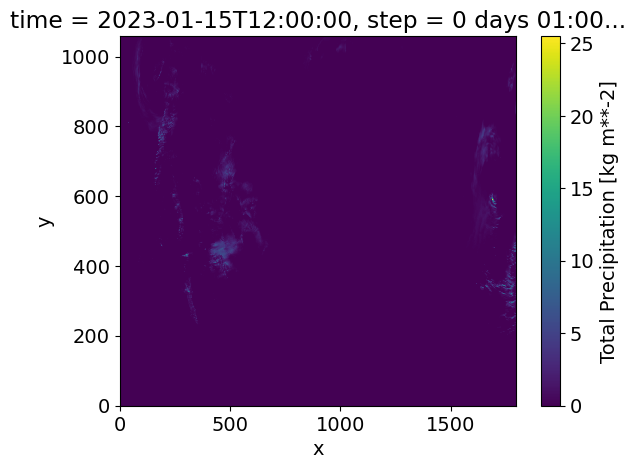

In [129]:
ds.tp.isel(step=1).plot()

In [130]:
dsi = ds.herbie.nearest_points([(-87.6298, 41.8781), (-87.9789, 41.7183), (-87.9646831, 41.8031498)], 
                               names=["Chicago", "Argonne", "Barn"])
dsi

/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "tp".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<xarray.Dataset>
Dimensions:              (step: 47, point: 3)
Coordinates:
    time                 datetime64[ns] 2023-01-15T12:00:00
  * step                 (step) timedelta64[ns] 00:00:00 ... 1 days 22:00:00
    surface              float64 0.0
    latitude             (point) float64 41.88 41.71 41.79
    longitude            (point) float64 272.4 272.0 272.0
    valid_time           (step) datetime64[ns] 2023-01-15T12:00:00 ... 2023-0...
    metpy_crs            object Projection: lambert_conformal_conic
    y                    (point) float64 4.197e+05 3.987e+05 4.077e+05
    x                    (point) float64 8.185e+05 7.915e+05 7.915e+05
  * point                (point) <U7 'Chicago' 'Argonne' 'Barn'
Data variables:
    tp                   (point, step) float32 0.0 0.0 0.0 0.0 ... 8.58 8.6 8.6
    gribfile_projection  (point) object None None None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    searchString:            (:APCP:surface:0-1*|:APCP:surface:1-2*|:APCP:sur...

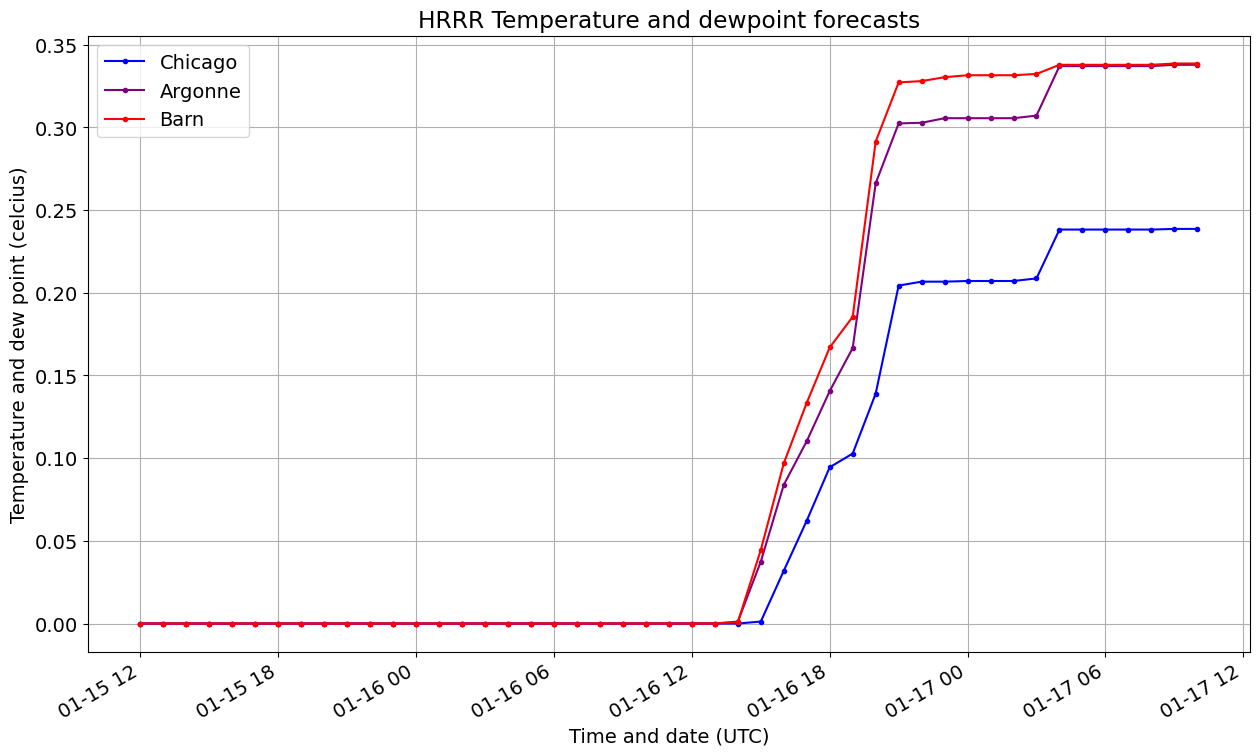

In [134]:
inches_per_mm = 0.0393701

plt.figure(figsize=[15,8])
(dsi.tp*inches_per_mm).isel(point=0).plot(color='blue', x="valid_time", marker=".", label=dsi.point[0].values)
(dsi.tp*inches_per_mm).isel(point=1).plot(color='purple', x="valid_time", marker=".", label=dsi.point[1].values)
(dsi.tp*inches_per_mm).isel(point=2).plot(color='red', x="valid_time", marker=".", label=dsi.point[2].values)

plt.grid()
plt.ylabel('Temperature and dew point (celcius)')
plt.xlabel('Time and date (UTC)')
plt.title('HRRR Temperature and dewpoint forecasts')


plt.legend()